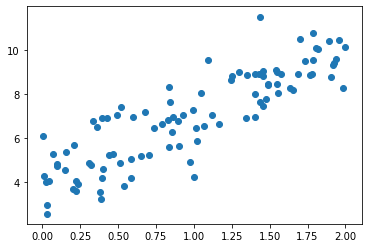

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)
X = x.reshape(-1, 1)
plt.scatter(x, y)
plt.show()

In [65]:
import numpy as np
# 批量梯度下降法解线性回归
class LinearReg:
    def __init__(self,max_iter=10000,min_error=1e-8,eta=1e-2):
        self.coef=None
        self.intercept=None
        self.theta=None
        self.max_iter=max_iter
        self.min_error=min_error
        self.eta=eta
    def fit(self,trainX,trainY):
        trainX=np.hstack((np.ones((len(trainX),1)),trainX))
        self.theta=np.ones((trainX.shape[1]))
        loss_value=self.loss_function(self.theta,trainX,trainY)
        # 循环获取当前梯度的值，通过当前梯度多值求下一次theta，当前theta和下一次theta的损失函数的值小于指定的min_error，停止循环
        for i in range(self.max_iter):
            gradient=self.d_loss_function(self.theta,trainX,trainY)
            last_theta = self.theta
            self.theta=self.theta-gradient*self.eta
            if np.absolute(self.loss_function(self.theta,trainX,trainY)- self.loss_function(last_theta,trainX,trainY))<self.min_error:
                break
        self.intercept=self.theta[0]
        self.coef=self.theta[1:]
    # 损失函数 
    def loss_function(self,theta,X,y):
        return (X.dot(theta)-y).T.dot((X.dot(theta)-y))*2.0/len(y)
     
    # 损失函数的梯度                                      
    def d_loss_function(self,theta,X,y):        
        return X.T.dot(X.dot(theta)-y) *1.0/len(y)
        def predict(self,testX):
        X_b = np.hstack([np.ones((len(testX), 1)), testX])
        return np.dot(self.theta,X_b.T)
         

[3.00706818]
4.021451446472803


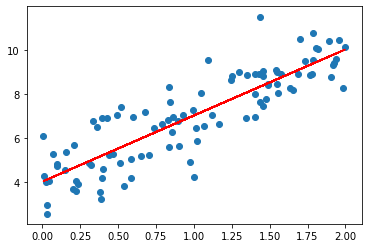

In [74]:
lr=LinearReg()
lr.fit(X ,y)
print(lr.coef)
print(lr.intercept)
plt.scatter(X[:,0], y)
plt.plot(X[:,0],np.hstack((np.ones((len(X),1)),X)).dot(lr.theta),c='r')
plt.show()

In [47]:
# sklean 线性回归
from sklearn.linear_model import LinearRegression
l=LinearRegression();
l.fit(X ,y)
print(l.coef_)
print(l.intercept_)


[3.00517447]
4.0236966721039
